In [33]:
from pde import CartesianGrid, ScalarField, DiffusionPDE, MemoryStorage, plot_kymograph,PDEBase, Boundaries
import numpy as np

In [35]:
class HeatPDE(PDEBase):
    def __init__(self, diffusion_constant):
        self.alpha = diffusion_constant
        

    def evolution_rate(self, state, t=0):
        
        return self.alpha * state.laplace(bc=[{"value":400.0}, {"value":400.0}])
    
    

In [36]:
length = 15.0e-3
alpha = 1.0e-5  # diffusion coefficient

grid = CartesianGrid([[0, length]], [50])  # domain from 0 to 1 with 100 points

In [37]:
state = ScalarField(grid, data=np.full(grid.shape, 919.0), with_ghost_cells=False)
state.data[0] = 400.0
state.data[-1] = 400.0

In [38]:
# Define Boundary Conditions

pde = HeatPDE(diffusion_constant=alpha)


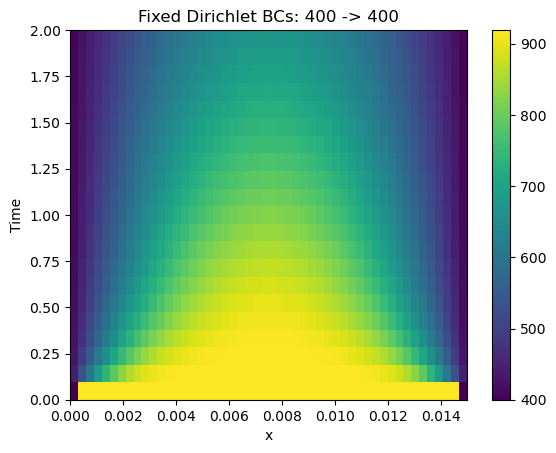

In [39]:
storage = MemoryStorage()
pde.solve(state, t_range=2.0, dt=1e-2, tracker=storage.tracker(0.1), solver="scipy")

plot_kymograph(storage, title="Fixed Dirichlet BCs: 400 -> 400")

: 

: 